<a href="https://colab.research.google.com/github/Gaeli75/Machine-Learning-Pratices/blob/main/British_Airways_Customer_review_insights_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
sklearn.set_config(transform_output='pandas')
import warnings

warnings.filterwarnings('ignore')

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
#base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
#pages = 10
#page_size = 100

reviews = []

# for i in range(1, pages + 1):
#for i in range(1, pages + 1):

    #print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    #url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
   # response = requests.get(url)

    # Parse content
    #content = response.content
    #parsed_content = BeautifulSoup(content, 'html.parser')
    #or para in parsed_content.find_all("div", {"class": "text_content"}):
        #reviews.append(para.get_text())

    #print(f"   ---> {len(reviews)} total reviews")

In [ ]:
#df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,"✅ Trip Verified | First the good news, the clu..."
1,✅ Trip Verified | I have never travelled wit...
2,"✅ Trip Verified | Terrible overall, medium ser..."
3,✅ Trip Verified | London Heathrow to Male In...
4,Not Verified | Very good flight following an ...


In [ ]:
df


,reviews
0,"First the good news, the club suites are such..."
1,I have never travelled with British airways...
2,"Terrible overall, medium service and the flig..."
3,London Heathrow to Male In new business cla...
4,Not Verified | Very good flight following an ...
...,...
995,Edinburgh to Kuala Lumpur via London. I have...
996,I was supposed to fly from London City to Am...
997,I purchased a ticket for Dublin to Mauritius...
998,London to Shanghai. The Concorde room in Hea...


In [ ]:
df.columns


Index(['reviews'], dtype='object')

In [ ]:
df.head()

,reviews
0,"First the good news, the club suites are such..."
1,I have never travelled with British airways...
2,"Terrible overall, medium service and the flig..."
3,London Heathrow to Male In new business cla...
4,Not Verified | Very good flight following an ...


In [ ]:
df.columns


Index(['reviews'], dtype='object')

In [ ]:
df.head()

,reviews
0,"First the good news, the club suites are such..."
1,I have never travelled with British airways...
2,"Terrible overall, medium service and the flig..."
3,London Heathrow to Male In new business cla...
4,Not Verified | Very good flight following an ...


In [ ]:
df.columns

Index(['reviews'], dtype='object')

In [ ]:
df.shape


In [ ]:
# Proceed with sentiment analysis
from textblob import TextBlob

def get_sentiment(text):
    sentiment = TextBlob(str(text)).sentiment.polarity
    if sentiment > 0:
        return "Positive"
    elif sentiment < 0:
        return "Negative"
    else:
        return "Neutral"

df["sentiment"] = df["reviews"].apply(get_sentiment)

# Save results
df.to_csv("/content/sentiment_analysis_results.csv", index=False)

print("✅ Sentiment Analysis Complete!")

✅ Sentiment Analysis Complete!


In [ ]:
sentinemt_df = pd.read_csv("/content/sentiment_analysis_results.csv")

In [ ]:
sentinemt_df.head()

,reviews,sentiment
0,"First the good news, the club suites are such...",Positive
1,I have never travelled with British airways...,Positive
2,"Terrible overall, medium service and the flig...",Negative
3,London Heathrow to Male In new business cla...,Positive
4,Not Verified | Very good flight following an ...,Positive


In [ ]:
sentinemt_df['sentiment'].unique()

array(['Positive', 'Negative', 'Neutral'], dtype=object)

In [ ]:
sentiment_counts = sentinemt_df["sentiment"].value_counts()
print(sentiment_counts)


sentiment
Positive    616
Negative    372
Neutral      12
Name: count, dtype: int64


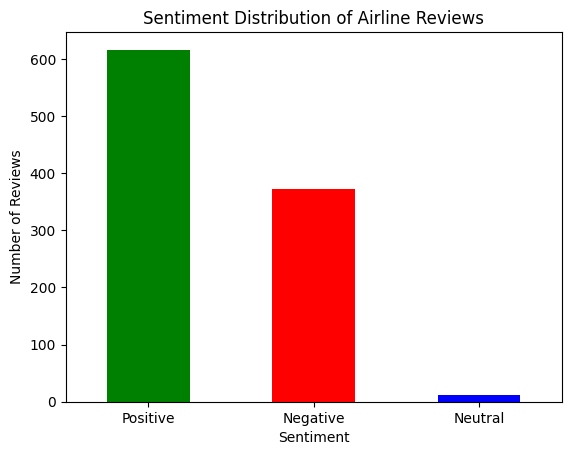

In [ ]:
import matplotlib.pyplot as plt

# Plot sentiment counts
sentiment_counts.plot(kind="bar", color=["green", "red", "blue"])
plt.title("Sentiment Distribution of Airline Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=0)
plt.show()


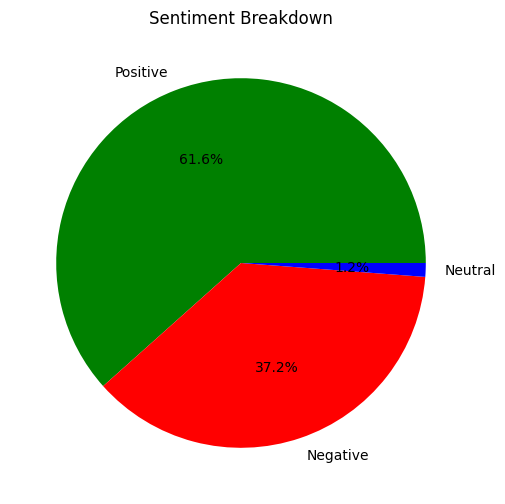

In [ ]:
# Pie chart for sentiment distribution
plt.figure(figsize=(6,6))
df["sentiment"].value_counts().plot.pie(autopct="%1.1f%%", colors=["green", "red", "blue"])
plt.title("Sentiment Breakdown")
plt.ylabel("")
plt.show()



In [ ]:
#Finding most Negative words

In [ ]:
import nltk
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
nltk.download("stopwords")
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
negative_reviews = sentinemt_df[sentinemt_df["sentiment"] == "Negative"]  # Filter for negative reviews
#negative_reviews = negative_reviews["reviews"].str.cat(sep=' ') # Combine all negative reviews into a single string   #df[df["sentiment"] == "Negative"]["cleaned_review"]


In [ ]:
stop_words = set(stopwords.words("english"))
all_words = []

for review in negative_reviews:
    words = word_tokenize(str(review).lower())  # Convert to lowercase and tokenize
    words = [word for word in words if word.isalpha() and word not in stop_words]  # Remove stopwords and non-alphabetic words
    all_words.extend(words)

# Count most common words
word_counts = Counter(all_words)
common_complaints = word_counts.most_common(10)  # Get the top 10 most frequent complaint words

# Display complaints
print("🔴 **Common Complaints in Negative Reviews:**")
for word, count in common_complaints:
    print(f"{word}: {count} times")

🔴 **Common Complaints in Negative Reviews:**
reviews: 1 times
sentiment: 1 times
